# Imports

In [25]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Load Data

In [26]:
data = pd.read_csv('cleaned_dataset.csv')

/tmp/ipykernel_363732/1410160792.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_dataset.csv')


# Feature Selection

In [39]:
# TODO: Category ?
features = ['Rating', 'Rating Count', 'Installs', 'Size', 'In app purchases']  # Add or remove features as necessary
X = data[features]
X.head()

,Rating,Rating Count,Installs,Size,In app purchases
0,4.090909,66.0,10000.0,5800000.0,False
1,4.000000,8.0,1000.0,5300000.0,False
2,3.866667,15.0,10000.0,5700000.0,False
3,4.000000,18.0,5000.0,5800000.0,False
4,4.023256,86.0,50000.0,5700000.0,False


In [40]:
# X = pd.get_dummies(X, columns=['Category'])
# X.head()

# Scaling
Standardize the data to ensure all features contribute equally to the distance calculations.

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for convenience
scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features_df.head()

,Rating,Rating Count,Installs,Size,In app purchases
0,0.512928,-0.051424,-0.071571,-0.598090,-0.568964
1,0.462432,-0.051673,-0.072665,-0.617142,-0.568964
2,0.388373,-0.051643,-0.071571,-0.601900,-0.568964
3,0.462432,-0.051630,-0.072178,-0.598090,-0.568964
4,0.475350,-0.051338,-0.066707,-0.601900,-0.568964


In [42]:
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

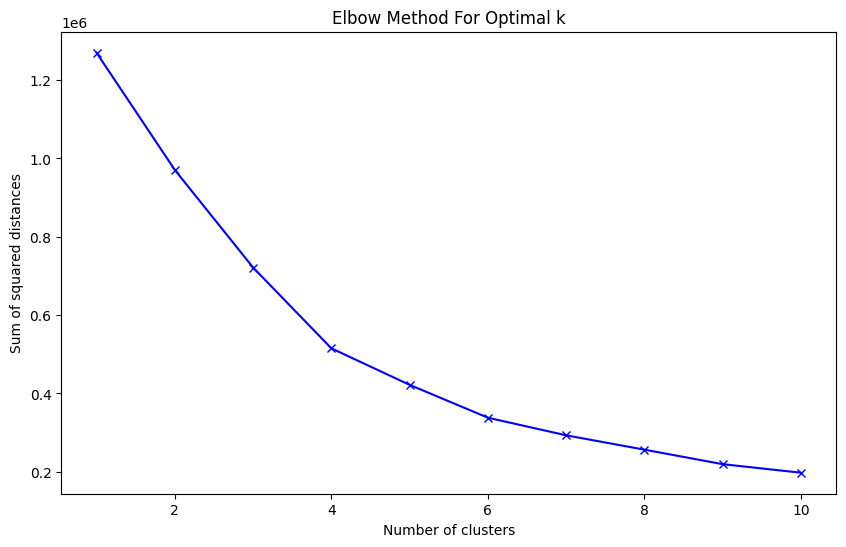

In [43]:
# Plot the Elbow method result
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
# Assuming the optimal k is 3 based on the Elbow method
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
data['KMeans_Cluster'] = kmeans.labels_

data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 55,Unnamed: 56,KMeans_Cluster
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000.0,1000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000.0,5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,50000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
